##Google Drive

In [ ]:
from google.colab import drive
import sys

#Mount Google Drive
drive.mount('/content/drive/')

#Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Capstone/'

#Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/utilities/p2_shallow_learning/'

#Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/models/p2_shallow_learning'

Mounted at /content/drive/


## Warning

In [ ]:
import warnings

#Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#Set default matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
#Use TensorFlow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

## Random Seed

In [ ]:
#Set the random seed for TensorFlow and numpy
random_seed = 42
tf.random.set_seed(random_seed)
import numpy as np
np.random.seed(random_seed)

## Data Preprocessing

In [ ]:
#Change the working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

#Import the shallow utilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/utilities/p2_shallow_learning


In [ ]:
import pandas as pd

#Load the data and make a copy of it as df_train
df_raw_train = pd.read_excel(abspath_curr + 'capstone-10_08_21.xlsx')
df_train = df_raw_train.copy(deep=True)

#Identify the target and print the head of df_train
target = 'PartyPref'
df_train.head()

,Unnamed: 0,GeoFIPS,State,Area,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,0,"""01001""",Alabama,"Autauga, AL",2004,20081,15196,"Bush, George W.",4758,"Kerry, John F.",127,10438,R,75.673522,23.694039,0.632439,9,0,0,R,48366,27542,0.049238,0.036768,0.162070,0.038479,0.138793,0.011902,0.192625,0.041858,0.032253,0.027695,0.946963,0.119589,0.014354,0.081339,5.199570,3.882728,17.114713,4.063411,14.656644,1.256860,20.341344,4.420236,3.405941,2.924613,12.628688,1.515793,8.589459,Solid R
1,1,"""01003""",Alabama,"Baldwin, AL",2004,69320,52971,"Bush, George W.",15599,"Kerry, John F.",750,37372,R,76.415176,22.502885,1.081939,9,0,0,R,156266,30361,0.350878,0.251037,1.070932,0.248370,0.487527,0.129003,0.332555,0.028461,0.134056,0.218770,3.927737,0.586491,0.072837,0.016820,8.933337,6.391390,27.265879,6.323489,12.412415,3.284410,8.466835,0.724616,3.413059,5.569874,14.932033,1.854427,0.428236,Solid R
2,2,"""01005""",Alabama,"Barbour, AL",2004,10777,5899,"Bush, George W.",4832,"Kerry, John F.",46,1067,R,54.736940,44.836225,0.426835,9,0,0,R,28287,22836,0.010004,0.032842,0.098995,0.013283,0.097943,0.005348,0.259196,0.093115,0.014381,0.000000,0.681321,0.000000,0.046833,0.009381,1.468324,4.820342,14.529862,1.949595,14.375456,0.784946,38.043154,13.666833,2.110752,0.000000,0.000000,6.873852,1.376884,Tossup
3,3,"""01007""",Alabama,"Bibb, AL",2004,7600,5472,"Bush, George W.",2089,"Kerry, John F.",39,3383,R,72.000000,27.486842,0.513158,9,0,0,R,21721,21006,0.036132,0.008701,0.051660,0.000000,0.065524,0.003620,0.024087,0.013826,0.013675,0.011194,0.239625,0.000000,0.008930,0.002276,15.078560,3.631090,21.558685,0.000000,27.344392,1.510694,10.051956,5.769849,5.706834,4.671466,0.000000,3.726656,0.949817,Solid R
4,4,"""01009""",Alabama,"Blount, AL",2004,21504,17386,"Bush, George W.",3938,"Kerry, John F.",180,13448,R,80.850074,18.312872,0.837054,9,0,0,R,54124,23550,0.049729,0.039895,0.139867,0.014230,0.104269,0.038672,0.000000,0.000000,0.033241,0.000000,0.504418,0.080714,0.000000,0.003801,9.858689,7.909115,27.728392,2.821073,20.671150,7.666657,0.000000,0.000000,6.589971,0.000000,16.001412,0.000000,0.753542,Solid R


In [ ]:
#List the columns in df_train
list(df_train.columns)

['Unnamed: 0',
 'GeoFIPS',
 'State',
 'Area',
 'Year',
 'TotalVotes',
 'RepVotes',
 'RepCandidate',
 'DemVotes',
 'DemCandidate',
 'ThirdVotes',
 'PluralityVotes',
 'PluralityParty',
 'RepVotesTotalPercent',
 'DemVotesTotalPercent',
 'ThirdVotesTotalPercent',
 'ElectoralRepVotes',
 'ElectoralDemVotes',
 'ElectoralOtherVotes',
 'VictoriousParty',
 'Population',
 'Per-Capita Income',
 'Construction',
 'Education and Health',
 'Finance',
 'Food and Recreation',
 'Government',
 'Information',
 'Manufacturing',
 'Natural Resources',
 'Other',
 'Professional',
 'Total GDP',
 'Trade',
 'Transportation',
 'Utilities',
 'Construction Share',
 'Education and Health Share',
 'Finance Share',
 'Food and Recreation Share',
 'Government Share',
 'Information Share',
 'Manufacturing Share',
 'Natural Resources Share',
 'Other Share',
 'Professional Share',
 'Trade Share',
 'Transportation Share',
 'Utilities Share',
 'PartyPref']

In [ ]:
#Drop the GeoFIPS and Area columns that function as identifiers
df_train = df_train.drop(['GeoFIPS','Area'], axis=1)
df_train.head()

,Unnamed: 0,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,0,Alabama,2004,20081,15196,"Bush, George W.",4758,"Kerry, John F.",127,10438,R,75.673522,23.694039,0.632439,9,0,0,R,48366,27542,0.049238,0.036768,0.162070,0.038479,0.138793,0.011902,0.192625,0.041858,0.032253,0.027695,0.946963,0.119589,0.014354,0.081339,5.199570,3.882728,17.114713,4.063411,14.656644,1.256860,20.341344,4.420236,3.405941,2.924613,12.628688,1.515793,8.589459,Solid R
1,1,Alabama,2004,69320,52971,"Bush, George W.",15599,"Kerry, John F.",750,37372,R,76.415176,22.502885,1.081939,9,0,0,R,156266,30361,0.350878,0.251037,1.070932,0.248370,0.487527,0.129003,0.332555,0.028461,0.134056,0.218770,3.927737,0.586491,0.072837,0.016820,8.933337,6.391390,27.265879,6.323489,12.412415,3.284410,8.466835,0.724616,3.413059,5.569874,14.932033,1.854427,0.428236,Solid R
2,2,Alabama,2004,10777,5899,"Bush, George W.",4832,"Kerry, John F.",46,1067,R,54.736940,44.836225,0.426835,9,0,0,R,28287,22836,0.010004,0.032842,0.098995,0.013283,0.097943,0.005348,0.259196,0.093115,0.014381,0.000000,0.681321,0.000000,0.046833,0.009381,1.468324,4.820342,14.529862,1.949595,14.375456,0.784946,38.043154,13.666833,2.110752,0.000000,0.000000,6.873852,1.376884,Tossup
3,3,Alabama,2004,7600,5472,"Bush, George W.",2089,"Kerry, John F.",39,3383,R,72.000000,27.486842,0.513158,9,0,0,R,21721,21006,0.036132,0.008701,0.051660,0.000000,0.065524,0.003620,0.024087,0.013826,0.013675,0.011194,0.239625,0.000000,0.008930,0.002276,15.078560,3.631090,21.558685,0.000000,27.344392,1.510694,10.051956,5.769849,5.706834,4.671466,0.000000,3.726656,0.949817,Solid R
4,4,Alabama,2004,21504,17386,"Bush, George W.",3938,"Kerry, John F.",180,13448,R,80.850074,18.312872,0.837054,9,0,0,R,54124,23550,0.049729,0.039895,0.139867,0.014230,0.104269,0.038672,0.000000,0.000000,0.033241,0.000000,0.504418,0.080714,0.000000,0.003801,9.858689,7.909115,27.728392,2.821073,20.671150,7.666657,0.000000,0.000000,6.589971,0.000000,16.001412,0.000000,0.753542,Solid R


In [ ]:
from sklearn.model_selection import train_test_split

#Drop the unnamed column at this a duplicate of the index
df_train = df_train.drop(['Unnamed: 0'], axis=1)

#Divide the training data into 60% train, 20% validation, and 20% test
df_train, df_val, df_test = np.split(df_train.sample(frac=1, random_state=random_seed), 
                                     [int(.6*len(df_train)), int(.8*len(df_train))])

#Reset the index for each data frame
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Tennessee,2016,106271,68212,"Trump, Donald J.",31013,"Clinton, Hillary R.",7046,37199,R,64.186843,29.182938,6.630219,11,0,0,R,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,0.102465,Solid R
1,Alabama,2012,23950,18331,"Romney, W. Mitt",5239,"Obama, Barack H.",380,13092,R,76.538622,21.874739,1.586639,9,0,0,R,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,0.000000,Solid R
2,Ohio,2016,45894,30487,"Trump, Donald J.",13294,"Clinton, Hillary R.",2113,17193,R,66.429163,28.966749,4.604088,18,0,0,R,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,0.218995,Solid R
3,Texas,2008,594,522,"McCain, John S. III",67,"Obama, Barack H.",5,455,R,87.878788,11.279461,0.841751,34,0,0,R,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,0.903159,Solid R
4,New York,2008,58802,28579,"McCain, John S. III",29129,"Obama, Barack H.",1094,-550,D,48.602088,49.537431,1.860481,0,31,0,D,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,7.727519,Tilt R


In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,7404,47


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,2468,47


In [ ]:
#Print the dimensions of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,2468,47


In [ ]:
#Check for common variables in df_train, df_val, and df_test, along with the target
df_common_var = common_var_checker(df_train, df_val, df_test, target)
df_common_var

,common var
0,Construction
1,Construction Share
2,DemCandidate
3,DemVotes
4,DemVotesTotalPercent
5,Education and Health
6,Education and Health Share
7,ElectoralDemVotes
8,ElectoralOtherVotes
9,ElectoralRepVotes


In [ ]:
#Get the features in df_train but not df_val or df_test
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Get the features in df_val but not df_train or df_test
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Get the features in df_test but not df_train or df_val
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Remove the uncommon features from df_train, df_val, and df_test
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

In [ ]:
#Print the head of df_train
df_train.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Tennessee,2016,106271,68212,"Trump, Donald J.",31013,"Clinton, Hillary R.",7046,37199,R,64.186843,29.182938,6.630219,11,0,0,R,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,0.102465,Solid R
1,Alabama,2012,23950,18331,"Romney, W. Mitt",5239,"Obama, Barack H.",380,13092,R,76.538622,21.874739,1.586639,9,0,0,R,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,0.000000,Solid R
2,Ohio,2016,45894,30487,"Trump, Donald J.",13294,"Clinton, Hillary R.",2113,17193,R,66.429163,28.966749,4.604088,18,0,0,R,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,0.218995,Solid R
3,Texas,2008,594,522,"McCain, John S. III",67,"Obama, Barack H.",5,455,R,87.878788,11.279461,0.841751,34,0,0,R,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,0.903159,Solid R
4,New York,2008,58802,28579,"McCain, John S. III",29129,"Obama, Barack H.",1094,-550,D,48.602088,49.537431,1.860481,0,31,0,D,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,7.727519,Tilt R


In [ ]:
#Print the head of df_val
df_val.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,North Carolina,2008,17254,11790,"McCain, John S. III",5167,"Obama, Barack H.",297,6623,R,68.331981,29.946679,1.721340,0,15,0,D,36840,27539,0.024827,0.022904,0.114244,0.013847,0.112749,0.002886,0.202912,0.006835,0.024947,0.035966,0.626561,0.045230,0.016432,0.002782,3.962423,3.655510,18.233500,2.210000,17.994896,0.460610,32.385035,1.090875,3.981576,5.740223,7.218770,2.622570,0.444011,Solid R
1,North Dakota,2008,2139,1301,"McCain, John S. III",792,"Obama, Barack H.",46,509,R,60.822814,37.026648,2.150538,3,0,0,R,4372,35840,0.011187,0.015446,0.025140,0.002909,0.014029,0.002232,0.010005,0.046030,0.003125,0.000000,0.155766,0.022994,0.000000,0.002669,7.181927,9.916156,16.139594,1.867545,9.006458,1.432919,6.423096,29.550736,2.006214,0.000000,14.761886,0.000000,1.713468,Solid R
2,Maine,2008,21301,8721,"McCain, John S. III",12152,"Obama, Barack H.",428,-3431,D,40.941740,57.048965,2.009295,0,4,0,D,35860,38345,0.063587,0.063837,0.169777,0.040512,0.179051,0.006270,0.523468,0.000000,0.028921,0.118987,1.318245,0.119717,0.000000,0.004118,4.823610,4.842575,12.879017,3.073177,13.582528,0.475632,39.709462,0.000000,2.193902,9.026167,9.081544,0.000000,0.312385,Likely D
3,Nebraska,2012,4939,3922,"Romney, W. Mitt",882,"Obama, Barack H.",135,3040,R,79.408787,17.857866,2.733347,5,0,0,R,10376,50996,0.011693,0.000000,0.102746,0.008301,0.050359,0.008160,0.021767,0.137063,0.015076,0.012239,0.474402,0.104736,0.000000,0.002262,2.464787,0.000000,21.658003,1.749782,10.615259,1.720060,4.588303,28.891742,3.177896,2.579880,22.077479,0.000000,0.476811,Solid R
4,Nebraska,2008,16277,10817,"McCain, John S. III",5046,"Obama, Barack H.",414,5771,R,66.455735,31.000799,2.543466,4,1,0,R,36301,36282,0.040993,0.158020,0.187620,0.047050,0.206873,0.021005,0.027181,0.000000,0.037036,0.061714,1.211499,0.000000,0.424007,0.000000,3.383659,13.043345,15.486600,3.883619,17.075788,1.733803,2.243584,0.000000,3.057039,5.094020,0.000000,34.998543,0.000000,Solid R


In [ ]:
#Print the head of df_test
df_test.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Arkansas,2004,44211,27303,"Bush, George W.",16479,"Kerry, John F.",429,10824,R,61.756124,37.273529,0.970347,6,0,0,R,118168,28756,0.167841,0.482915,0.531866,0.174748,0.384050,0.161575,1.667254,0.157270,0.098677,0.591319,5.236127,0.673677,0.120689,0.024246,3.205442,9.222752,10.157622,3.337352,7.334620,3.085773,31.841359,3.003556,1.884542,11.293061,12.865941,2.304929,0.463052,Solid R
1,Nebraska,2004,1486,1171,"Bush, George W.",296,"Kerry, John F.",19,875,R,78.802153,19.919246,1.278600,5,0,0,R,3055,23838,0.001624,0.000000,0.011332,0.000674,0.013946,0.000000,0.007554,0.014580,0.000000,0.000099,0.059787,0.004996,0.004982,0.000000,2.716310,0.000000,18.953953,1.127335,23.326141,0.000000,12.634854,24.386572,0.000000,0.165588,8.356332,8.332915,0.000000,Solid R
2,Nebraska,2016,15529,9933,"Trump, Donald J.",4544,"Clinton, Hillary R.",1052,5389,R,63.964196,29.261382,6.774422,5,0,0,R,36677,43784,0.052033,0.000000,0.262217,0.044889,0.264723,0.061076,0.348112,0.101106,0.040693,0.094289,1.601001,0.300121,0.000000,0.031742,3.250029,0.000000,16.378316,2.803808,16.534843,3.814863,21.743397,6.315174,2.541722,5.889378,18.745835,0.000000,1.982635,Solid R
3,Missouri,2012,7511,4887,"Romney, W. Mitt",2474,"Obama, Barack H.",150,2413,R,65.064572,32.938357,1.997071,10,0,0,R,17537,32252,0.023594,0.031852,0.094450,0.042120,0.072052,0.008000,0.050281,0.037239,0.015190,0.000000,0.393069,0.000000,0.016295,0.001996,6.002508,8.103412,24.028860,10.715676,18.330624,2.035266,12.791902,9.473909,3.864461,0.000000,0.000000,4.145583,0.507799,Solid R
4,Tennessee,2012,4237,2516,"Romney, W. Mitt",1643,"Obama, Barack H.",78,873,R,59.381638,38.777437,1.840925,11,0,0,R,13583,27437,0.016332,0.018365,0.046260,0.000000,0.044337,0.004237,0.016561,0.008183,0.010116,0.008510,0.200490,0.026357,0.000000,0.001232,8.146042,9.160058,23.073470,0.000000,22.114320,2.113322,8.260262,4.081500,5.045638,4.244601,13.146292,0.000000,0.614494,Solid R


In [ ]:
#Concatenate df_train, df_val, and df_test together and call id_checker on it
df = pd.concat([df_train, df_val, df_test])
df_id = id_checker(df)
df_id.head()

""
0
1
2
3
4


In [ ]:
import numpy as np

#Drop the identifiers from df_train, df_val, and df_test
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
#Print the head of df_train
df_train.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Tennessee,2016,106271,68212,"Trump, Donald J.",31013,"Clinton, Hillary R.",7046,37199,R,64.186843,29.182938,6.630219,11,0,0,R,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,0.102465,Solid R
1,Alabama,2012,23950,18331,"Romney, W. Mitt",5239,"Obama, Barack H.",380,13092,R,76.538622,21.874739,1.586639,9,0,0,R,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,0.000000,Solid R
2,Ohio,2016,45894,30487,"Trump, Donald J.",13294,"Clinton, Hillary R.",2113,17193,R,66.429163,28.966749,4.604088,18,0,0,R,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,0.218995,Solid R
3,Texas,2008,594,522,"McCain, John S. III",67,"Obama, Barack H.",5,455,R,87.878788,11.279461,0.841751,34,0,0,R,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,0.903159,Solid R
4,New York,2008,58802,28579,"McCain, John S. III",29129,"Obama, Barack H.",1094,-550,D,48.602088,49.537431,1.860481,0,31,0,D,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,7.727519,Tilt R


In [ ]:
#Print the head of df_val
df_val.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,North Carolina,2008,17254,11790,"McCain, John S. III",5167,"Obama, Barack H.",297,6623,R,68.331981,29.946679,1.721340,0,15,0,D,36840,27539,0.024827,0.022904,0.114244,0.013847,0.112749,0.002886,0.202912,0.006835,0.024947,0.035966,0.626561,0.045230,0.016432,0.002782,3.962423,3.655510,18.233500,2.210000,17.994896,0.460610,32.385035,1.090875,3.981576,5.740223,7.218770,2.622570,0.444011,Solid R
1,North Dakota,2008,2139,1301,"McCain, John S. III",792,"Obama, Barack H.",46,509,R,60.822814,37.026648,2.150538,3,0,0,R,4372,35840,0.011187,0.015446,0.025140,0.002909,0.014029,0.002232,0.010005,0.046030,0.003125,0.000000,0.155766,0.022994,0.000000,0.002669,7.181927,9.916156,16.139594,1.867545,9.006458,1.432919,6.423096,29.550736,2.006214,0.000000,14.761886,0.000000,1.713468,Solid R
2,Maine,2008,21301,8721,"McCain, John S. III",12152,"Obama, Barack H.",428,-3431,D,40.941740,57.048965,2.009295,0,4,0,D,35860,38345,0.063587,0.063837,0.169777,0.040512,0.179051,0.006270,0.523468,0.000000,0.028921,0.118987,1.318245,0.119717,0.000000,0.004118,4.823610,4.842575,12.879017,3.073177,13.582528,0.475632,39.709462,0.000000,2.193902,9.026167,9.081544,0.000000,0.312385,Likely D
3,Nebraska,2012,4939,3922,"Romney, W. Mitt",882,"Obama, Barack H.",135,3040,R,79.408787,17.857866,2.733347,5,0,0,R,10376,50996,0.011693,0.000000,0.102746,0.008301,0.050359,0.008160,0.021767,0.137063,0.015076,0.012239,0.474402,0.104736,0.000000,0.002262,2.464787,0.000000,21.658003,1.749782,10.615259,1.720060,4.588303,28.891742,3.177896,2.579880,22.077479,0.000000,0.476811,Solid R
4,Nebraska,2008,16277,10817,"McCain, John S. III",5046,"Obama, Barack H.",414,5771,R,66.455735,31.000799,2.543466,4,1,0,R,36301,36282,0.040993,0.158020,0.187620,0.047050,0.206873,0.021005,0.027181,0.000000,0.037036,0.061714,1.211499,0.000000,0.424007,0.000000,3.383659,13.043345,15.486600,3.883619,17.075788,1.733803,2.243584,0.000000,3.057039,5.094020,0.000000,34.998543,0.000000,Solid R


In [ ]:
#Print the head of df_test
df_test.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Arkansas,2004,44211,27303,"Bush, George W.",16479,"Kerry, John F.",429,10824,R,61.756124,37.273529,0.970347,6,0,0,R,118168,28756,0.167841,0.482915,0.531866,0.174748,0.384050,0.161575,1.667254,0.157270,0.098677,0.591319,5.236127,0.673677,0.120689,0.024246,3.205442,9.222752,10.157622,3.337352,7.334620,3.085773,31.841359,3.003556,1.884542,11.293061,12.865941,2.304929,0.463052,Solid R
1,Nebraska,2004,1486,1171,"Bush, George W.",296,"Kerry, John F.",19,875,R,78.802153,19.919246,1.278600,5,0,0,R,3055,23838,0.001624,0.000000,0.011332,0.000674,0.013946,0.000000,0.007554,0.014580,0.000000,0.000099,0.059787,0.004996,0.004982,0.000000,2.716310,0.000000,18.953953,1.127335,23.326141,0.000000,12.634854,24.386572,0.000000,0.165588,8.356332,8.332915,0.000000,Solid R
2,Nebraska,2016,15529,9933,"Trump, Donald J.",4544,"Clinton, Hillary R.",1052,5389,R,63.964196,29.261382,6.774422,5,0,0,R,36677,43784,0.052033,0.000000,0.262217,0.044889,0.264723,0.061076,0.348112,0.101106,0.040693,0.094289,1.601001,0.300121,0.000000,0.031742,3.250029,0.000000,16.378316,2.803808,16.534843,3.814863,21.743397,6.315174,2.541722,5.889378,18.745835,0.000000,1.982635,Solid R
3,Missouri,2012,7511,4887,"Romney, W. Mitt",2474,"Obama, Barack H.",150,2413,R,65.064572,32.938357,1.997071,10,0,0,R,17537,32252,0.023594,0.031852,0.094450,0.042120,0.072052,0.008000,0.050281,0.037239,0.015190,0.000000,0.393069,0.000000,0.016295,0.001996,6.002508,8.103412,24.028860,10.715676,18.330624,2.035266,12.791902,9.473909,3.864461,0.000000,0.000000,4.145583,0.507799,Solid R
4,Tennessee,2012,4237,2516,"Romney, W. Mitt",1643,"Obama, Barack H.",78,873,R,59.381638,38.777437,1.840925,11,0,0,R,13583,27437,0.016332,0.018365,0.046260,0.000000,0.044337,0.004237,0.016561,0.008183,0.010116,0.008510,0.200490,0.026357,0.000000,0.001232,8.146042,9.160058,23.073470,0.000000,22.114320,2.113322,8.260262,4.081500,5.045638,4.244601,13.146292,0.000000,0.614494,Solid R


In [ ]:
#Get the date time variables from df_train, df_val, and df_test
datetime_vars = []
df_train = datetime_transformer(df_train, datetime_vars)
df_val = datetime_transformer(df_val, datetime_vars)
df_test = datetime_transformer(df_test, datetime_vars)

In [ ]:
#Print the head of df_train
df_train.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Tennessee,2016,106271,68212,"Trump, Donald J.",31013,"Clinton, Hillary R.",7046,37199,R,64.186843,29.182938,6.630219,11,0,0,R,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,0.102465,Solid R
1,Alabama,2012,23950,18331,"Romney, W. Mitt",5239,"Obama, Barack H.",380,13092,R,76.538622,21.874739,1.586639,9,0,0,R,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,0.000000,Solid R
2,Ohio,2016,45894,30487,"Trump, Donald J.",13294,"Clinton, Hillary R.",2113,17193,R,66.429163,28.966749,4.604088,18,0,0,R,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,0.218995,Solid R
3,Texas,2008,594,522,"McCain, John S. III",67,"Obama, Barack H.",5,455,R,87.878788,11.279461,0.841751,34,0,0,R,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,0.903159,Solid R
4,New York,2008,58802,28579,"McCain, John S. III",29129,"Obama, Barack H.",1094,-550,D,48.602088,49.537431,1.860481,0,31,0,D,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,7.727519,Tilt R


In [ ]:
#Print the head of df_val
df_val.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,North Carolina,2008,17254,11790,"McCain, John S. III",5167,"Obama, Barack H.",297,6623,R,68.331981,29.946679,1.721340,0,15,0,D,36840,27539,0.024827,0.022904,0.114244,0.013847,0.112749,0.002886,0.202912,0.006835,0.024947,0.035966,0.626561,0.045230,0.016432,0.002782,3.962423,3.655510,18.233500,2.210000,17.994896,0.460610,32.385035,1.090875,3.981576,5.740223,7.218770,2.622570,0.444011,Solid R
1,North Dakota,2008,2139,1301,"McCain, John S. III",792,"Obama, Barack H.",46,509,R,60.822814,37.026648,2.150538,3,0,0,R,4372,35840,0.011187,0.015446,0.025140,0.002909,0.014029,0.002232,0.010005,0.046030,0.003125,0.000000,0.155766,0.022994,0.000000,0.002669,7.181927,9.916156,16.139594,1.867545,9.006458,1.432919,6.423096,29.550736,2.006214,0.000000,14.761886,0.000000,1.713468,Solid R
2,Maine,2008,21301,8721,"McCain, John S. III",12152,"Obama, Barack H.",428,-3431,D,40.941740,57.048965,2.009295,0,4,0,D,35860,38345,0.063587,0.063837,0.169777,0.040512,0.179051,0.006270,0.523468,0.000000,0.028921,0.118987,1.318245,0.119717,0.000000,0.004118,4.823610,4.842575,12.879017,3.073177,13.582528,0.475632,39.709462,0.000000,2.193902,9.026167,9.081544,0.000000,0.312385,Likely D
3,Nebraska,2012,4939,3922,"Romney, W. Mitt",882,"Obama, Barack H.",135,3040,R,79.408787,17.857866,2.733347,5,0,0,R,10376,50996,0.011693,0.000000,0.102746,0.008301,0.050359,0.008160,0.021767,0.137063,0.015076,0.012239,0.474402,0.104736,0.000000,0.002262,2.464787,0.000000,21.658003,1.749782,10.615259,1.720060,4.588303,28.891742,3.177896,2.579880,22.077479,0.000000,0.476811,Solid R
4,Nebraska,2008,16277,10817,"McCain, John S. III",5046,"Obama, Barack H.",414,5771,R,66.455735,31.000799,2.543466,4,1,0,R,36301,36282,0.040993,0.158020,0.187620,0.047050,0.206873,0.021005,0.027181,0.000000,0.037036,0.061714,1.211499,0.000000,0.424007,0.000000,3.383659,13.043345,15.486600,3.883619,17.075788,1.733803,2.243584,0.000000,3.057039,5.094020,0.000000,34.998543,0.000000,Solid R


In [ ]:
#Print the head of df_test
df_test.head()

,State,Year,TotalVotes,RepVotes,RepCandidate,DemVotes,DemCandidate,ThirdVotes,PluralityVotes,PluralityParty,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,VictoriousParty,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,Utilities Share,PartyPref
0,Arkansas,2004,44211,27303,"Bush, George W.",16479,"Kerry, John F.",429,10824,R,61.756124,37.273529,0.970347,6,0,0,R,118168,28756,0.167841,0.482915,0.531866,0.174748,0.384050,0.161575,1.667254,0.157270,0.098677,0.591319,5.236127,0.673677,0.120689,0.024246,3.205442,9.222752,10.157622,3.337352,7.334620,3.085773,31.841359,3.003556,1.884542,11.293061,12.865941,2.304929,0.463052,Solid R
1,Nebraska,2004,1486,1171,"Bush, George W.",296,"Kerry, John F.",19,875,R,78.802153,19.919246,1.278600,5,0,0,R,3055,23838,0.001624,0.000000,0.011332,0.000674,0.013946,0.000000,0.007554,0.014580,0.000000,0.000099,0.059787,0.004996,0.004982,0.000000,2.716310,0.000000,18.953953,1.127335,23.326141,0.000000,12.634854,24.386572,0.000000,0.165588,8.356332,8.332915,0.000000,Solid R
2,Nebraska,2016,15529,9933,"Trump, Donald J.",4544,"Clinton, Hillary R.",1052,5389,R,63.964196,29.261382,6.774422,5,0,0,R,36677,43784,0.052033,0.000000,0.262217,0.044889,0.264723,0.061076,0.348112,0.101106,0.040693,0.094289,1.601001,0.300121,0.000000,0.031742,3.250029,0.000000,16.378316,2.803808,16.534843,3.814863,21.743397,6.315174,2.541722,5.889378,18.745835,0.000000,1.982635,Solid R
3,Missouri,2012,7511,4887,"Romney, W. Mitt",2474,"Obama, Barack H.",150,2413,R,65.064572,32.938357,1.997071,10,0,0,R,17537,32252,0.023594,0.031852,0.094450,0.042120,0.072052,0.008000,0.050281,0.037239,0.015190,0.000000,0.393069,0.000000,0.016295,0.001996,6.002508,8.103412,24.028860,10.715676,18.330624,2.035266,12.791902,9.473909,3.864461,0.000000,0.000000,4.145583,0.507799,Solid R
4,Tennessee,2012,4237,2516,"Romney, W. Mitt",1643,"Obama, Barack H.",78,873,R,59.381638,38.777437,1.840925,11,0,0,R,13583,27437,0.016332,0.018365,0.046260,0.000000,0.044337,0.004237,0.016561,0.008183,0.010116,0.008510,0.200490,0.026357,0.000000,0.001232,8.146042,9.160058,23.073470,0.000000,22.114320,2.113322,8.260262,4.081500,5.045638,4.244601,13.146292,0.000000,0.614494,Solid R


In [ ]:
#Concatenate df_train, df_val, and df_test and call nan_checker on it
df = pd.concat([df_train, df_val, df_test])
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype


In [ ]:
#Print the data types for any variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype


In [ ]:
#Identify any variables with missing values, their proportion of these, and their data type
df_miss = df_nan[df_nan['dtype'] == 'float'].reset_index(drop=True)
df_miss

,var,proportion,dtype


In [ ]:
#Separate df_train, df_val, and df_test
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0]]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,7404,47


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2468,47


In [ ]:
#Print the dimensions of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2468,47


In [ ]:
from sklearn.impute import SimpleImputer

#Check if there are any missing values and impute the variables that do in df_train, df_val, and df_test
if len(df_miss['var']) > 0:
  si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
  df_val[df_miss['var']] = si.fit_transform(df_val[df_miss['var']])
  df_test[df_miss['var']] = si.fit_transform(df_tet[df_miss['var']])

In [ ]:
#Concatenate df_train, df_val, and df_test and print the unique data types for each of the variables
df = pd.concat([df_train, df_val, df_test], sort=False)
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,int64
2,float64


In [ ]:
#Call cat_var_checker
df_cat = cat_var_checker(df)
df_cat

,var,nunique
0,State,51
1,PartyPref,7
2,RepCandidate,4
3,DemCandidate,3
4,PluralityParty,2
5,VictoriousParty,2


In [ ]:
#One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))
df.head()

,Year,TotalVotes,RepVotes,DemVotes,ThirdVotes,PluralityVotes,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,...,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,VictoriousParty_D,VictoriousParty_R
0,2016,106271,68212,31013,7046,37199,64.186843,29.182938,6.630219,11,0,0,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2012,23950,18331,5239,380,13092,76.538622,21.874739,1.586639,9,0,0,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2016,45894,30487,13294,2113,17193,66.429163,28.966749,4.604088,18,0,0,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008,594,522,67,5,455,87.878788,11.279461,0.841751,34,0,0,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2008,58802,28579,29129,1094,-550,48.602088,49.537431,1.860481,0,31,0,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Encode the categorical target in the combined data
le = LabelEncoder()
df[target] = le.fit_transform(df[target].astype(str))
df.head()

,Year,TotalVotes,RepVotes,DemVotes,ThirdVotes,PluralityVotes,RepVotesTotalPercent,DemVotesTotalPercent,ThirdVotesTotalPercent,ElectoralRepVotes,ElectoralDemVotes,ElectoralOtherVotes,Population,Per-Capita Income,Construction,Education and Health,Finance,Food and Recreation,Government,Information,Manufacturing,Natural Resources,Other,Professional,Total GDP,Trade,Transportation,Utilities,Construction Share,Education and Health Share,Finance Share,Food and Recreation Share,Government Share,Information Share,Manufacturing Share,Natural Resources Share,Other Share,Professional Share,Trade Share,Transportation Share,...,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,VictoriousParty_D,VictoriousParty_R
0,2016,106271,68212,31013,7046,37199,64.186843,29.182938,6.630219,11,0,0,218903,92478,0.859675,4.627005,3.522952,0.963855,0.942646,0.932500,0.672781,0.023631,0.370102,4.533720,20.510511,2.653422,0.387206,0.021016,4.191388,22.559189,17.176325,4.699322,4.595917,4.546449,3.280177,0.115214,1.804450,22.104374,12.936889,1.887842,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2012,23950,18331,5239,380,13092,76.538622,21.874739,1.586639,9,0,0,70944,27112,0.068006,0.118982,0.274811,0.048187,0.221386,0.032715,0.457242,0.000000,0.055033,0.060399,1.393801,0.000000,0.057040,0.000000,4.879176,8.536513,19.716660,3.457237,15.883616,2.347179,32.805400,0.000000,3.948412,4.333402,0.000000,4.092406,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2016,45894,30487,13294,2113,17193,66.429163,28.966749,4.604088,18,0,0,103613,39336,0.161189,0.791894,0.712986,0.169568,0.496064,0.093772,4.019487,0.024022,0.109208,0.350213,7.803363,0.712518,0.145353,0.017089,2.065635,10.148112,9.136907,2.173012,6.357054,1.201687,51.509676,0.307842,1.399499,4.487975,9.130909,1.862697,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008,594,522,67,5,455,87.878788,11.279461,0.841751,34,0,0,1197,22485,0.001720,0.001168,0.005529,0.000566,0.005705,0.000133,0.000737,0.007962,0.001387,0.000000,0.025134,0.000000,0.000000,0.000227,6.843320,4.647092,21.998090,2.251930,22.698337,0.529164,2.932283,31.678205,5.518421,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2008,58802,28579,29129,1094,-550,48.602088,49.537431,1.860481,0,31,0,135229,29936,0.148973,0.402036,0.811414,0.177089,0.692120,0.108917,0.973964,0.135607,0.108743,0.237033,4.722033,0.476963,0.084278,0.364896,3.154849,8.514045,17.183573,3.750270,14.657246,2.306570,20.625946,2.871793,2.302885,5.019723,10.100798,1.784782,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Separate df_train, df_val, and df_test
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0]]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,7404,104


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2468,104


In [ ]:
#Print the dimensions of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,2468,104


In [ ]:
#Arrange the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

#Arrange the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize the training, validation, and test data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

## Hyperparameter Tuning

In [ ]:
#Create a dictionary for the models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'LR': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'MLPC': MLPClassifier(early_stopping=True, random_state=random_seed),
          'RFC': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'HGBC': HistGradientBoostingClassifier(random_state=random_seed)}

In [ ]:
#Create a dictionary for the pipelines
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
#Get the predefined split cross-validator
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
param_grids = {}

#Outline the parameter grid for Logistic Regression

#The parameter grid for tol
tol_grid = [10 ** -2, 10 ** -1, 10 ** 0]

#The parameter grid for C
C_grid = [0.1, 1, 100]

#Update param_grids
param_grids['LR'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
#Outline the parameter grid for MLPClassifier

#The grids for alpha
alpha_grids = [1/i for i in range(50, 100)]

#The grids for learning_rate_init
learning_rate_init_grids = [1/i for i in range(60, 80)]

#Update param_grids
param_grids['MLPC'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
#Outline the parameter grid for random forest

#The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

#The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

#Update param_grids
param_grids['RFC'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
#Outline the parameter grid for histogram-based gradient boosting

#The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-5, 1)]

#The grids for min_samples_leaf
min_samples_leaf_grids = [1, 10, 100]

#Update param_grids
param_grids['HGBC'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
#Make a directory for the results
directory = os.path.dirname(abspath_curr + '/result/partypref/cv_results/GridSearchCV/')
if not os.path.exists(directory):
  os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

#The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

#For each model
for acronym in pipes.keys():
    #GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    #Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    #Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    #Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    #Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    #Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    #Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/partypref/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

#Sort best_score_params_estimator_gs in descending order of the best_score
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

#Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.719929,"{'model__alpha': 0.015625, 'model__learning_ra...","(MLPClassifier(activation='relu', alpha=0.0156..."
1,0.666241,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
2,0.611923,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
3,0.586776,"{'model__C': 100, 'model__tol': 0.01}","(LogisticRegression(C=100, class_weight='balan..."


## Model Selection

In [ ]:
#Get the best_score, best_param, and best_estimator from GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

#Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

#Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

## Interpretation

In [ ]:
#Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[2]

#Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

#Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

#Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,RepVotesTotalPercent,0.167346
1,DemVotesTotalPercent,0.128965
2,PluralityVotes,0.0797298
3,PluralityParty_D,0.0322001
4,PluralityParty_R,0.0272721


In [ ]:
df_fi_rfc.loc[(df_fi_rfc['Features'].str.contains('Inc'))]

,Features,Importance
12,Per-Capita Income,0.0151234


In [ ]:
df_fi_rfc.head(15)

,Features,Importance
0,RepVotesTotalPercent,0.167346
1,DemVotesTotalPercent,0.128965
2,PluralityVotes,0.0797298
3,PluralityParty_D,0.0322001
4,PluralityParty_R,0.0272721
5,DemVotes,0.0227507
6,ThirdVotesTotalPercent,0.018439
7,RepVotes,0.0176152
8,Government,0.0169898
9,Finance,0.0163772


In [ ]:
df_fi_rfc.iloc[10:25]

,Features,Importance
10,Government Share,0.0158519
11,Manufacturing Share,0.0155182
12,Per-Capita Income,0.0151234
13,ThirdVotes,0.0150668
14,Education and Health Share,0.014953
15,Food and Recreation,0.0148863
16,Population,0.0145648
17,Manufacturing,0.014506
18,TotalVotes,0.0141508
19,Education and Health,0.014043


## Plotting the Feature Importance

In [ ]:
#Make a directory for the figure
directory = os.path.dirname(abspath_curr + '/result/partypref/figure/')
if not os.path.exists(directory):
  os.makedirs(directory)

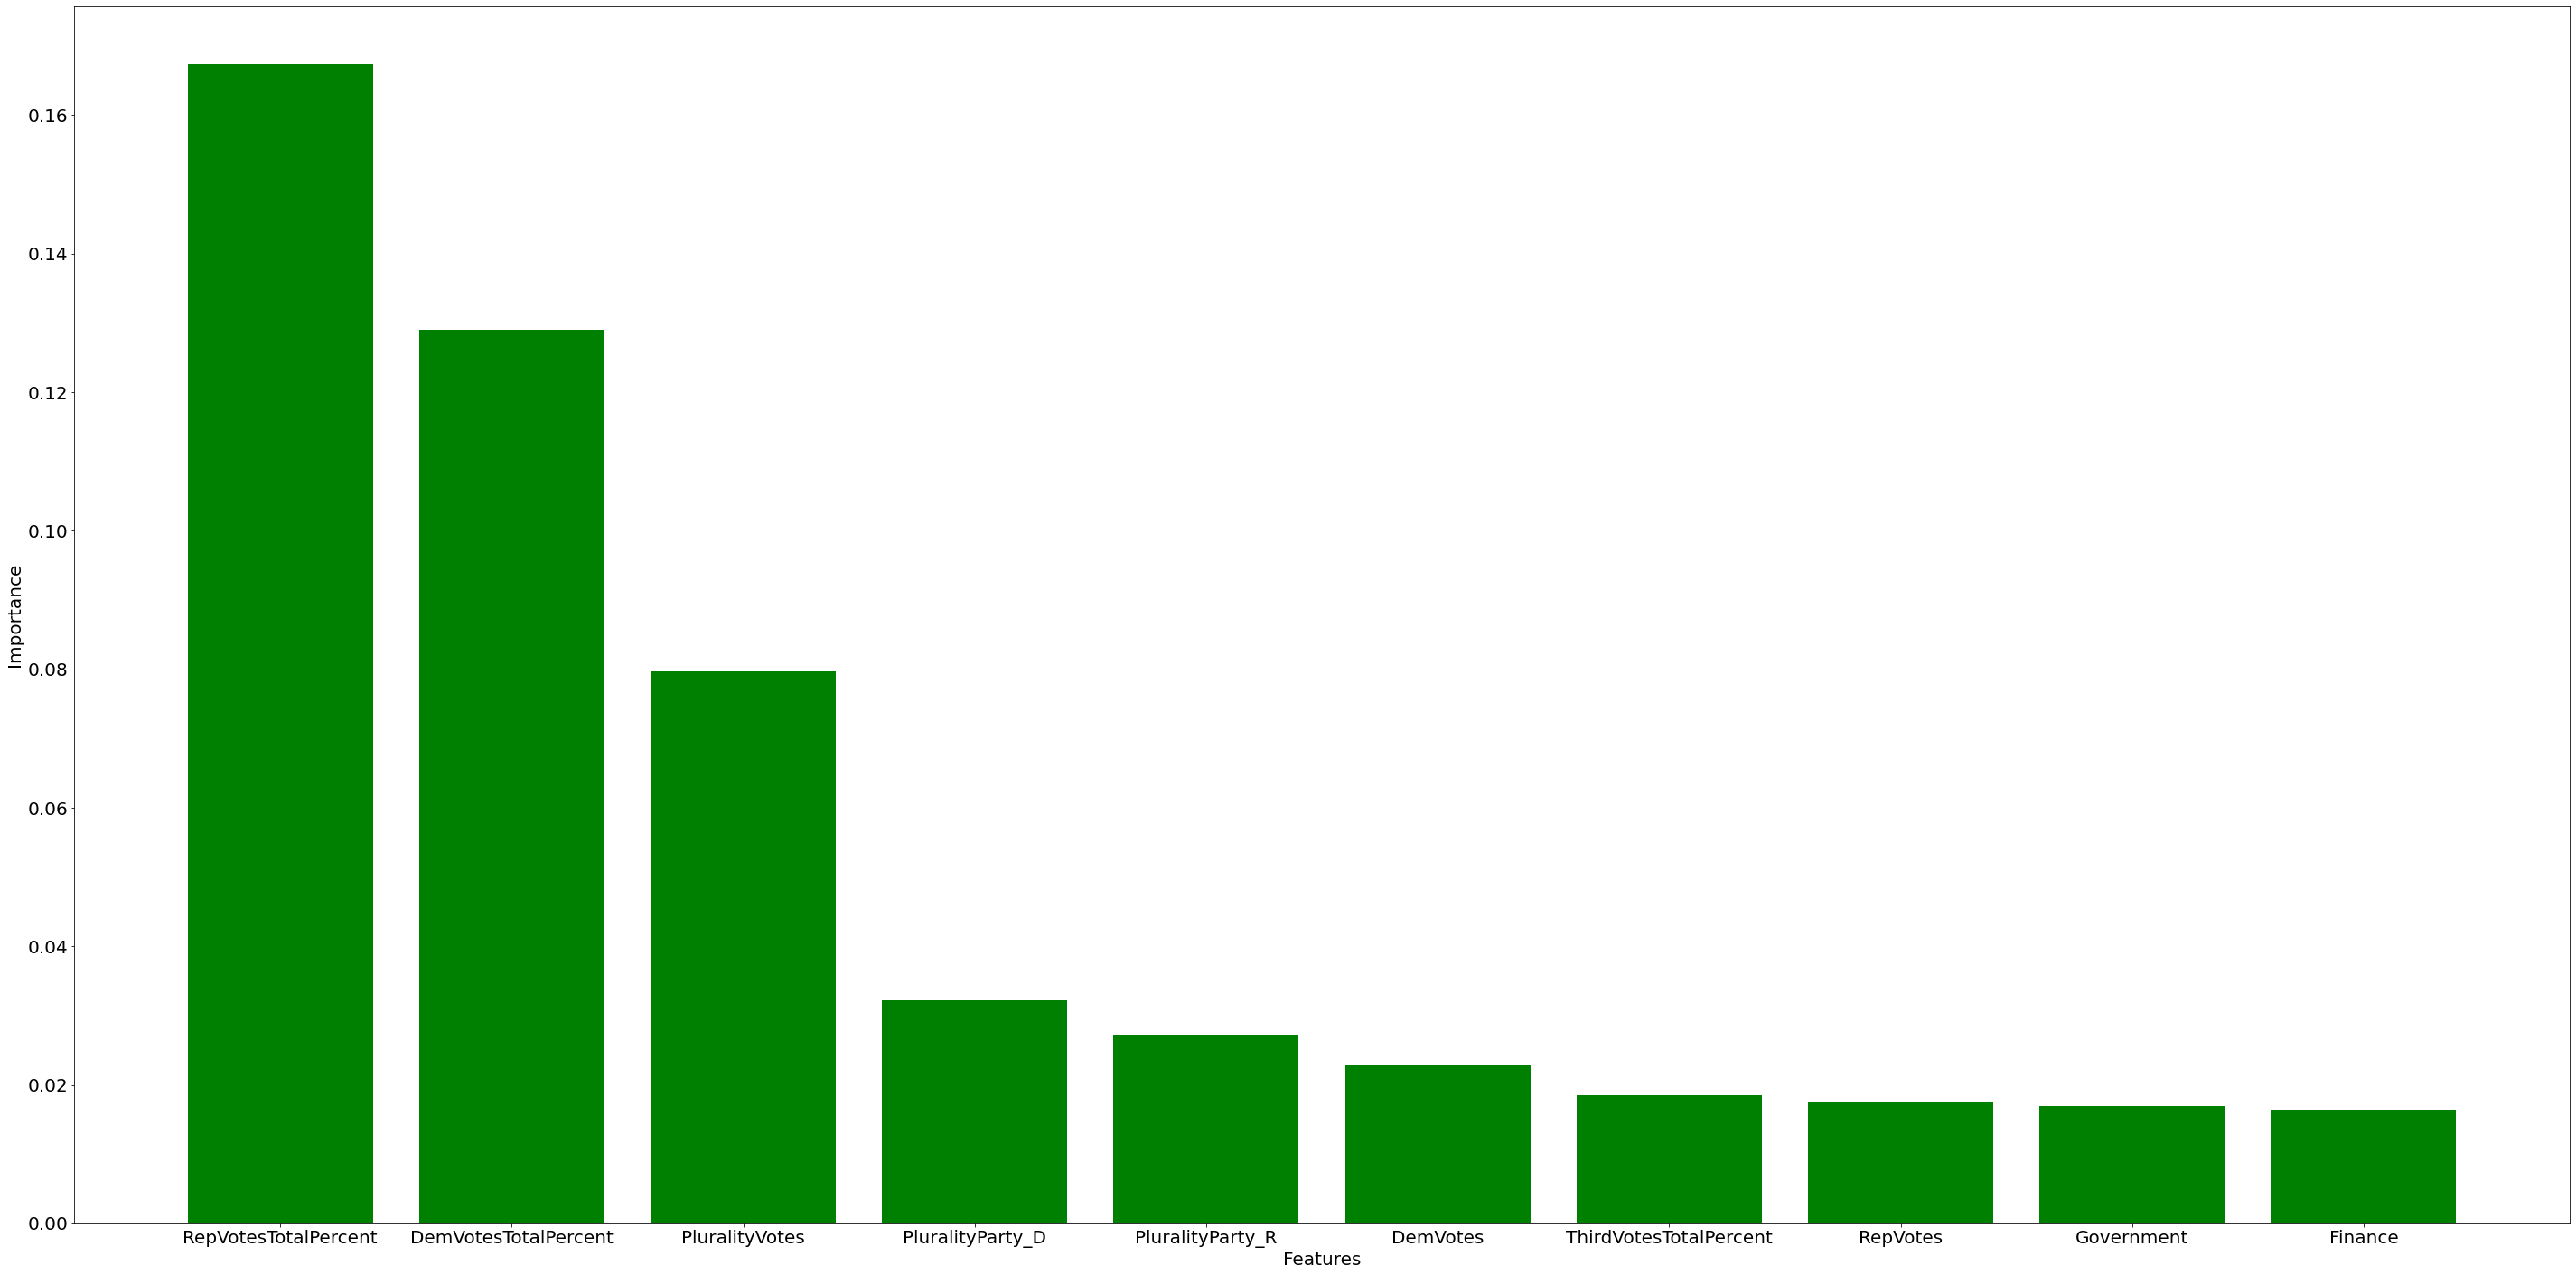

In [ ]:
#Make a figure that plots the ten most important features
fig = plt.figure(figsize=(40, 20))
plt.bar(df_fi_rfc['Features'][:10], df_fi_rfc['Importance'][:10], color = 'green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()